### Two wake case - replicating the results from Jacob's paper

Import necessary modules:

In [11]:
# Third party modules
import os 
import sys
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Custom modules
from stream_functions import StreamFunctions
from boundary_conditions import BoundaryConditions
from temporal_stability import TemporalStability
from sivp import SIVP

# Set the path to the current working directory
m_path = os.getcwd()
sys.path.append(m_path)

Declare necessary params:

In [12]:
# for case A,
SL_caseA = {}
SL_caseA['S'] = 0.2
SL_caseA['Lambda'] = -3.1

# for case B,
SL_caseB = {}
SL_caseB['S'] = 0.38
SL_caseB['Lambda'] = -3.1

# number of wakes and range of wake spacings
num_wakes = 2
wake_spacings = np.linspace(1,5,50)

# temporarily set the param values
val_set = {'S': SL_caseA['S'], 'Lambda': SL_caseA['Lambda'], 'L': 1.0, 'delta': 0.1, 's':-1}

# Arbitrary maximum limit attainable for c in temporal stability analysis
max_threshold_for_c = 1e6

# for SIVP,
iter_max = 50
dk_thres = 1e-8

Get a map of $\omega_i(k)$ to choose an appropriate initial guess for saddle point:

In [13]:
# set up the streamfunctions
sf = StreamFunctions(n_wakes=num_wakes)

# sets up the interfacial boundary conditions and returns the set of equations in matrix form
bc = BoundaryConditions(sf)

# matrices for the generalized eigenvalue problem Ax = cBx
A = bc.A_non_dim
B = bc.B_non_dim

# sets up the generalized eigenvalue problem
ts = TemporalStability(sf, bc, val_set)

# Create a meshgrid for wavenumber space
alpha_r = np.arange(0,20.01,0.5)
alpha_i = np.arange(-20,20,0.5)
#alpha_r = np.arange(0,1,0.5)
#alpha_i = np.arange(-0.5,0.5,0.5)
alpha_R, alpha_I = np.meshgrid(alpha_r, alpha_i)
alpha = alpha_R + 1j * alpha_I

# Initialize arrays to store the results
w_vals = np.zeros_like(alpha)

# For each real wavenumber, find the corresponding complex frequency that satisfies the dispersion relation
for i in range(alpha.shape[0]):
    print(f'Row {i+1} of {alpha.shape[0]}')
    for j in range(alpha.shape[1]):
        alpha_val = alpha[i,j]
        c_val_list, eigvecs = ts.find_c(alpha_val)
        temp_w_vals = c_val_list * alpha_val
        temp_w_vals = temp_w_vals[~np.isnan(np.abs(temp_w_vals))]
        temp_w_vals = temp_w_vals[~np.isinf(np.abs(temp_w_vals))]
        temp_w_vals = temp_w_vals[np.abs(temp_w_vals) <= max_threshold_for_c]
        if len(temp_w_vals) == 0:
            w_vals[i,j] = np.nan
        else:
            max_w_val_idx = np.argmax(np.imag(temp_w_vals))
            w_vals[i,j] = temp_w_vals[max_w_val_idx]

Row 1 of 80


C:\Users\tvivek\AppData\Local\Temp\ipykernel_24104\3390102868.py:31: RuntimeWarning: invalid value encountered in multiply
  temp_w_vals = c_val_list * alpha_val


Row 2 of 80
Row 3 of 80
Row 4 of 80
Row 5 of 80
Row 6 of 80
Row 7 of 80
Row 8 of 80
Row 9 of 80
Row 10 of 80
Row 11 of 80
Row 12 of 80
Row 13 of 80
Row 14 of 80
Row 15 of 80
Row 16 of 80
Row 17 of 80
Row 18 of 80
Row 19 of 80
Row 20 of 80
Row 21 of 80
Row 22 of 80
Row 23 of 80
Row 24 of 80
Row 25 of 80
Row 26 of 80
Row 27 of 80
Row 28 of 80
Row 29 of 80
Row 30 of 80
Row 31 of 80
Row 32 of 80
Row 33 of 80
Row 34 of 80
Row 35 of 80
Row 36 of 80
Row 37 of 80
Row 38 of 80
Row 39 of 80
Row 40 of 80
Row 41 of 80
Row 42 of 80
Row 43 of 80
Row 44 of 80
Row 45 of 80
Row 46 of 80
Row 47 of 80
Row 48 of 80
Row 49 of 80
Row 50 of 80
Row 51 of 80
Row 52 of 80
Row 53 of 80
Row 54 of 80
Row 55 of 80
Row 56 of 80
Row 57 of 80
Row 58 of 80
Row 59 of 80
Row 60 of 80
Row 61 of 80
Row 62 of 80
Row 63 of 80
Row 64 of 80
Row 65 of 80
Row 66 of 80
Row 67 of 80
Row 68 of 80
Row 69 of 80
Row 70 of 80
Row 71 of 80
Row 72 of 80
Row 73 of 80
Row 74 of 80
Row 75 of 80
Row 76 of 80
Row 77 of 80
Row 78 of 80
Row 79 

Visually locate the initial guess for saddle point

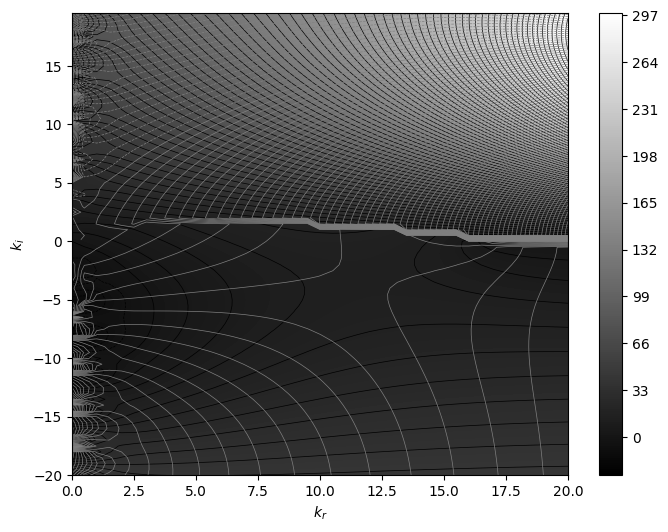

In [14]:
#plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Computer Modern"],
#})
fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contourf(alpha_R, alpha_I, np.imag(w_vals), levels=250)
cbar = plt.colorbar(cs)
#cs.set_clim(-100,100)
ax.contour(alpha_R, alpha_I, np.imag(w_vals), levels=100, colors='black', linewidths=0.5)
ax.contour(alpha_R, alpha_I, np.real(w_vals), levels=100, colors='gray', linewidths=0.5)
cs.set_cmap('gray')
ax.set_xlabel('$k_r$')
ax.set_ylabel('$k_i$')
plt.ion()
plt.show()

In [15]:
# save the w_vals to a file
import scipy.io as sio
sio.savemat('C:\\Users\\tvivek\\Desktop\\w_vals_2wakes.mat', {'w_vals': w_vals, 'alpha_R': alpha_R, 'alpha_I': alpha_I})

Use SIVP to get successive saddle point locations

In [ ]:
# initial guess for genuine saddle point
#k0j1 = 1 - 3j
k0j1 = 12 - 3j

# initialize the sivp class instance
sivp = SIVP(sf, bc, max_threshold_for_c, val_set)

# initial conditions for the SIVP
ws, q_hats = sivp.get_ws_q_hats(val_set, k0j1)
ws, q_hats = sivp.get_filtered_ws_qhats(ws, q_hats, max_threshold_for_c)
print(ws)

w = ws[0]
qhat = q_hats[:,0]

# necessary result variables
w_vals = np.zeros_like(wake_spacings, dtype=complex)
q_hat_vals = np.zeros((len(wake_spacings), len(qhat)), dtype=complex)
k0j1_vals = np.zeros_like(wake_spacings, dtype=complex)

# set the initial values
w_vals[0] = w
k0j1_vals[0] = k0j1
q_hat_vals[0,:] = qhat

# iterate through the range of wake spacings
for i, wake_spacing in enumerate(wake_spacings):
    print(f'wake_spacing = {wake_spacing}')
    val_set['L'] = wake_spacing
    iter_num = 0
    dk = np.inf

    if i == 0:
        k0j1 = k0j1_vals[0]
        w = w_vals[0]
        qhat = q_hat_vals[0, :]
        continue

    while iter_num < iter_max and dk > dk_thres:
        print('iter_num', iter_num)
        sivp.sub_all(val_set)
        sivp.sub_alpha(k0j1)
        sivp.eval_sub(w, qhat)
        xdot = sivp.eval_xdot()
        w_dot = xdot[-1]
        qhat_dot = xdot[:-1]
        qhat_dot_herm = np.conjugate(qhat_dot)
        qhat_dot_herm = qhat_dot_herm[:, np.newaxis].transpose()

        J2_inv = sivp.get_J2_inv(w, qhat)
        b2 = sivp.get_b2(w, w_dot, qhat, qhat_dot, qhat_dot_herm)

        x_ddot = J2_inv @ b2.ravel()
        d2wdk2 = x_ddot[-1]

        k0j2 = k0j1 - w_dot/d2wdk2

        if np.abs(k0j2 - k0j1) > 15:
            print('Convergence failed')
            w = w_vals[i-1]
            qhat = q_hat_vals[i-1, :]
            k0j1 = k0j1_vals[i-1]
            k0j2 = k0j1_vals[i-1]
            break

        w, qhat = sivp.get_x_multi_SIVP(k0j1, k0j2, w, qhat)

        dk = np.abs(k0j2 - k0j1)
        k0j1 = k0j2
        iter_num += 1

    w_vals[i] = w
    qhat = np.squeeze(qhat)
    q_hat_vals[i, :] = qhat
    k0j1_vals[i] = k0j1

[12.20893041 -3.83880552j -2.94783242-10.09090465j
  1.99487241-15.26017502j  5.87335373 -9.15821578j]
wake_spacing = 1.0
wake_spacing = 1.0816326530612246
iter_num 0
[np.complex128(1-3j), np.complex128(1-3.1j), np.complex128(0.9392091121998742-3.1j), np.complex128(0.9392091121998742-3.2j), np.complex128(0.9392091121998742-3.2876785964437576j)]


KeyboardInterrupt: 

In [ ]:
# save obtained results
sio.savemat('C:\\Users\\tvivek\\Desktop\\w_2wakes_0.mat', 
            {'S': val_set['S'], 
             'L': val_set['Lambda'], 
             'w_vals': w_vals, 
             'q_hat_vals': q_hat_vals, 
             'k0j1_vals': k0j1_vals, 
             'wake_spacings': wake_spacings})